<a href="https://colab.research.google.com/github/bangms/Algorithm/blob/main/KNN%EB%B6%84%EB%A5%98_%ED%95%9C%EA%B5%AD%EB%B0%A9%EC%86%A1%ED%86%B5%EC%8B%A0%EB%8C%80%ED%95%99%EA%B5%90_241026%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
#유클리드 거리 계산
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

#KNN 분류기 클래스
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    #훈련 데이터 저장
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    #각 샘플에 대한 예측 수행
    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    #단일 샘플에 대해 예측 수행 (K개의 최근접 이웃 찾기)
    def _predict(self, x):

        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]    # 모든 훈련 샘플과의 거리를 계산함
        k_indices = np.argsort(distances)[:self.k]    # 거리순으로 K개의 최근접 이웃 인덱스 찾기
        k_nearest_labels = [self.y_train[i] for i in k_indices]    # K개의 최근접 이웃의 클래스 레이블 조사
        most_common = Counter(k_nearest_labels).most_common(1)   # 다수결로 클래스 결정

        return most_common[0][0]


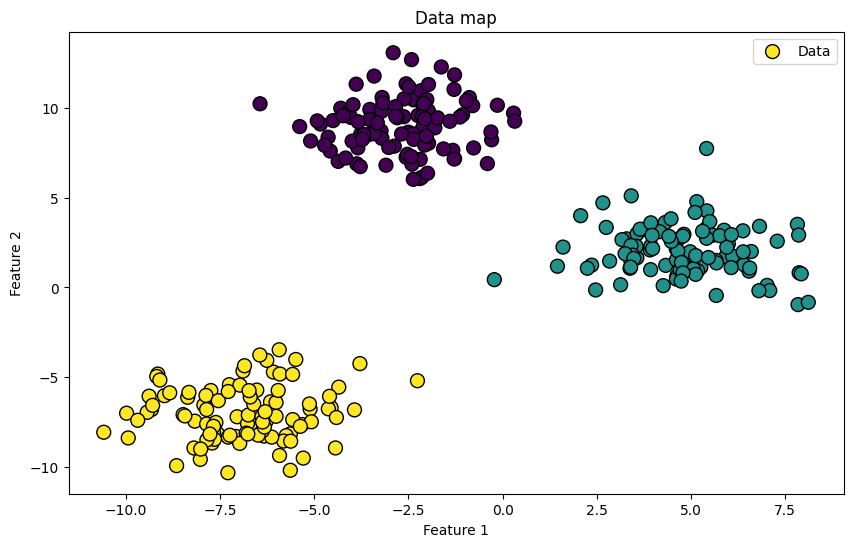

In [ ]:
#랜덤 데이터셋 생성
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.5)

#확인
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=100, edgecolor='k', label='Data')
plt.title("Data map")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



In [ ]:
#데이터셋을 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#KNN 분류기 만든 후 훈련 수행
k = 5 # K 값 설정
knn = KNNClassifier(k=k)
knn.fit(X_train, y_train)

#테스트 데이터에 대한 예측
y_pred = knn.predict(X_test)

#성능 평가
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"KNN 분류기 (K={k})의 정확도: {accuracy:.2f}")


KNN 분류기 (K=5)의 정확도: 1.00


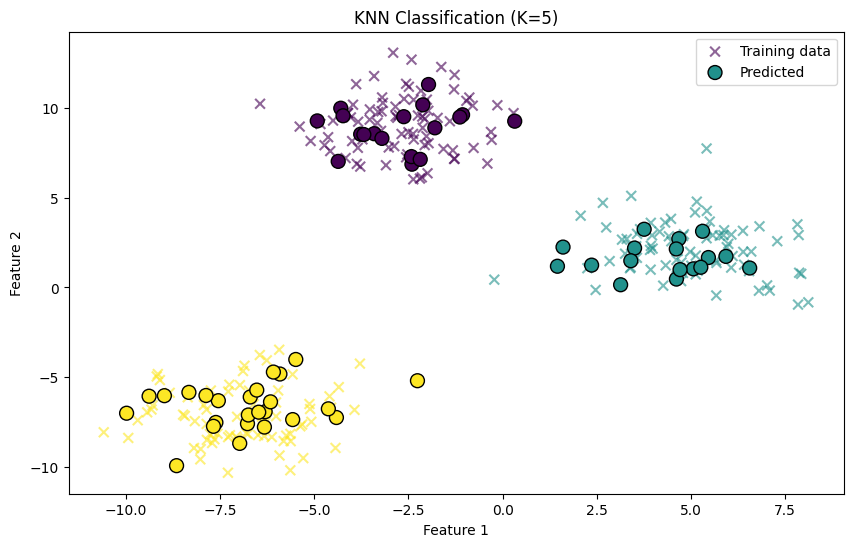

In [ ]:
#결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='x', s=50, alpha=0.6, label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='o', s=100, edgecolor='k', label='Predicted')
plt.title(f"KNN Classification (K={k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()